#Simple **back propagation** algorithm without hidden layers
CJ Chung


In [1]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

# convert output of sigmoid function to its derivative
def sigmoid_derivative(sigma): # sigma: weighted sum
    return sigmoid(sigma)*(1-sigmoid(sigma))    # <----- (1)

In [2]:
# input dataset
X = np.array([  [0, 0, 1],
                [0.1, 0.1, 1],
                [0, 1, 1],
                [0.1, 0.9, 1],
                [1, 0, 1],
                [0.9, 0.1, 1],
                [0.9, 0.9, 1],
                [1, 1, 1]  ])
            
y_target = np.array([0,0,0,0,0,0,1,1]) # AND

### np.dot() review

In [3]:
x = np.array([1,2,3])
y = np.array([1,1,1])
print(np.dot(x,y))

6


In [4]:
np.dot(X[0], y)

1.0

In [5]:
a = np.array([[1,2,3,4],[5,6,7,8]]) # 2x4
b = np.array([[1],[2],[3],[4]]) # 4x1
np.dot(a,b)

# [[1*1+2*2+3*3+4*4],
#  [5*1+6*2+7*3+8*4]]


array([[30],
       [70]])

### Back prop (BP) algorithm

In [6]:
# seed random numbers to make calculation deterministic, a good practice to degug
np.random.seed(1)
# initialize weights randomly with mean 0. random.random() outputs [0,1)
W = 2*np.random.random((3,1)) - 1 # 3 x 1 array
#W = 2*np.random.random((3,)) # The above works too

In [10]:
#@title
alpha = 1.0
print("Initial weights\n", W)
for _ in range(1000): #  for each epoch
  for i in range(len(X)): # i - index for each sample
    wsum = np.dot(X[i], W) # weighted sum
    y = sigmoid(wsum) # feed forward propagation    # <----- (2)
    e = y - y_target[i]  # y error                  # <------(3)
    delta = sigmoid_derivative(wsum) * e            # <------(4)
    # update weights
    for j in range(len(W)): 
      W[j] = W[j] - alpha * delta * X[i][j]         # <------(5)
print("Updated weights\n", W)

print ("\nOutput y after training with back prop:")
Y = sigmoid(np.dot(X, W))  # feed forward propagation with training data
print("Training data\n", Y.round())

# Unseen data for inference
X2 = np.array([ [0.0, 0.2, 1],
                [0.2, 1.0, 1],
                [0.8, 0.1, 1],
                [1.0, 0.7, 1]  ])
Y = sigmoid(np.dot(X2, W))  # feed forward propagation
print("Unseen data\n", Y.round())

Initial weights
 [[  6.96734645]
 [  6.9618116 ]
 [-10.02311252]]
Updated weights
 [[  7.90293156]
 [  7.90021314]
 [-11.33803446]]

Output y after training with back prop:
Training data
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]]
Unseen data
 [[0.]
 [0.]
 [0.]
 [1.]]


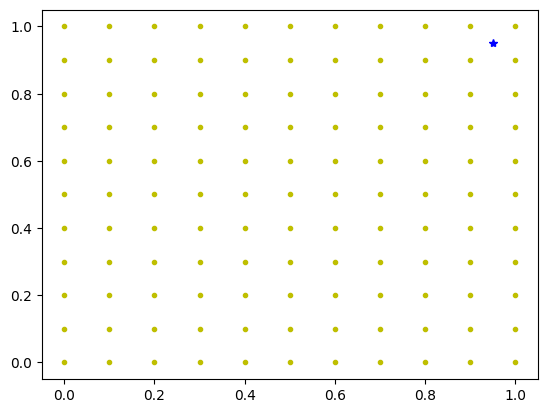

In [8]:
import matplotlib.pyplot as plt
# Hint for the graph. Modify the following code to plot the outputs of the 
# trained model where yellow dots represent the "0" class while blue start 
# represent the "1" class
for x in np.arange(0, 1.1, 0.1):
  for y in np.arange(0, 1.1, 0.1):
    plt.plot(x, y, 'y.')
plt.plot(0.95, 0.95, 'b*')
plt.show()

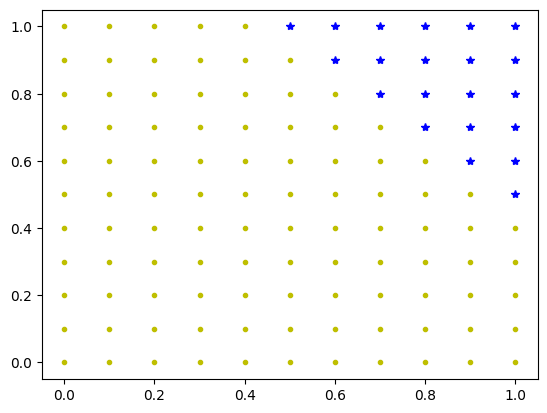

In [9]:
#@title
# Note that the vector W contains trained weight values
for x in np.arange(0, 1.1, 0.1):
  for y in np.arange(0, 1.1, 0.1):
    if sigmoid(np.dot([x,y,1], W)) > 0.5:
      plt.plot(x, y, 'b*') # to plot all fired points
    else:
      plt.plot(x, y, 'y.') # to plot all non-fired points